<a href="https://colab.research.google.com/github/lbenitoc/test/blob/master/Lab_Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<h1 align=center><font size = 5>Boston Housing</font></h1>

---

## Introducción


En este laboratorio, aprenderá a usar python para construir un modelo de regresión.


<h3>Objetivo de este Notebook<h3>    
<h5> 1. Como construir e interpretar un modelo de regresión.</h5>
<h5> 2. Descargar y limpiar un Dataset </h5>
<h5> 3. Realizar los pasos necesarios previos a la etapa de modelamiento </h5>
<h5> 4. Entrenar y Testear modelo </h5>     

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Importar Librerías</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Construir un modelo de regresión lineal</a>  
4. <a href="#item34">Entrenar y Testear el modelo</a>  

</font>
</div>

## Descargar y limpiar Dataset


Primero, importemos algunos módulos comunes, asegurémonos de que MatplotLib tenga una configuración adecuada para el tamaño de nuestros gráficos. También verificamos que Python 3.5 o posterior esté instalado (aunque Python 2.x puede funcionar, está obsoleto), así como Scikit-Learn ≥0.20.

In [1]:
# Verificando Python ≥3.5
import sys
assert sys.version_info >= (3,5)

# Scikit-Learn 
import sklearn
assert sklearn.__version__ >= "0.20"

# Imports comunes
import pandas as pd
import numpy as np
import os

# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore las advertencias poco útiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

<b>Valores de la vivienda en los suburbios de Boston</b>

<h5>La variable <b>medv</b> es la variable objetivo.</h5>

<b>Descripción de datos</b>

El data frame de Boston tiene 506 filas y 14 columnas.

<b>Este data frame contiene las siguientes columnas:</b>

---

* <b>crim : </b> Tasa de criminalidad per cápita por ciudad.

* <b>zn : </b> Proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.

* <b>indus : </b> Proporción de acres comerciales no minoristas por ciudad.

* <b>chas : </b> Variable ficticia de Charles River (= 1 si el tramo limita con el río; 0 en caso contrario).

* <b>nox : </b>Concentración de óxidos de nitrógeno (partes por 10 millones).

* <b>rm : </b>Número medio de habitaciones por vivienda.

* <b>años : </b> Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.

* <b>dis : </b>Media ponderada de las distancias a cinco centros de empleo de Boston.

* <b>rad : </b>Indice de accesibilidad a carreteras radiales.

* <b>impuesto : </b>Tasa de impuesto a la propiedad de valor total por \$ 10,000.

* <b>ptratio : </b>Proporción alumno-profesor por ciudad.

* <b>black : </b> 1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad.

* <b>lstat : </b>Estatus más bajo de la población (porcentaje).

* <b>medv : </b>Valor medio de las viviendas ocupadas por sus propietarios en \$ 1000.

---

<strong>Puede consultar este [link](https://kaggle.com/c/boston-housing) para leer más sobre la fuente de datos boston housing.</strong>


In [2]:
from sklearn.datasets import load_boston

In [3]:
#cargamos la data
housing = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [4]:
print(housing.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
type(housing)

sklearn.utils.Bunch

In [6]:
housing.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
pddf = pd.DataFrame(housing.data, columns = housing.feature_names)
pddf.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [8]:
pddf.shape

(506, 13)

In [9]:
pddf['TARGET'] = housing.target
pddf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
pddf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


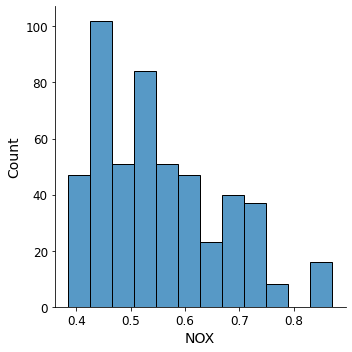

In [11]:
import seaborn as sns
sns.displot(pddf.NOX)

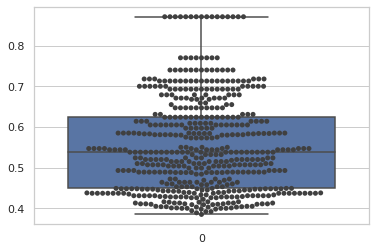

In [12]:

sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=pddf.NOX, orient="v")
ax = sns.swarmplot(data=pddf.NOX, color=".25")


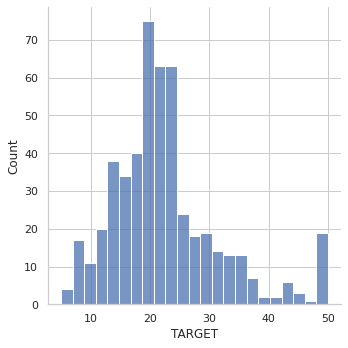

In [13]:
sns.displot(pddf.TARGET)

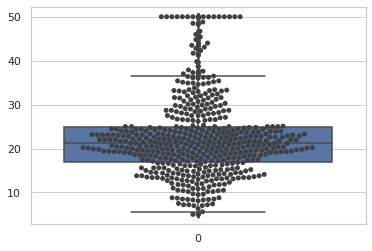

In [14]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(data=pddf.TARGET, orient="v")
ax = sns.swarmplot(data=pddf.TARGET, color=".25")

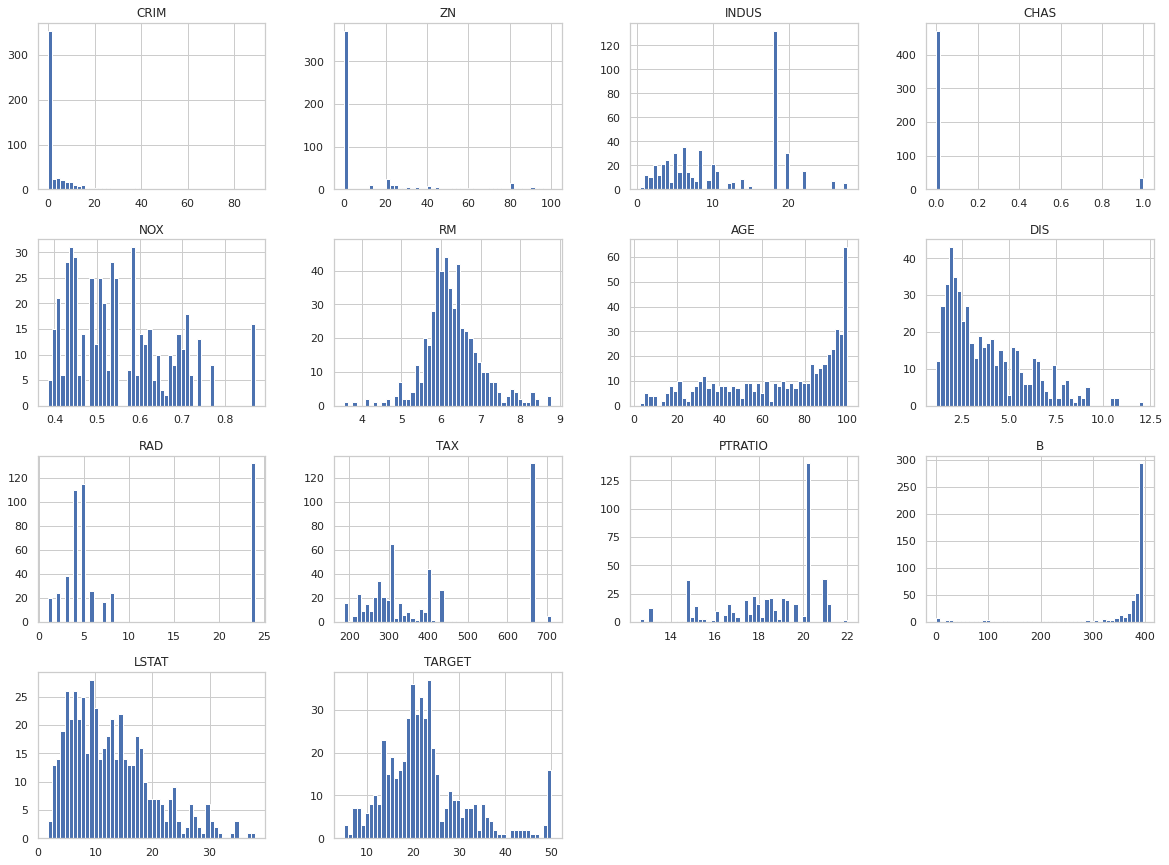

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
pddf.hist(bins=50, figsize=(20,15))
plt.show()

In [16]:
# Shuffle the data
from sklearn.utils import shuffle
pddf = shuffle(pddf, random_state=123)


In [17]:
X = pddf.NOX
y = pddf.TARGET


In [18]:
# to make this notebook's output identical at every run
np.random.seed(123)


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)


In [20]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)


(506,)
(354,)
(152,)


Text(0, 0.5, '$y$')

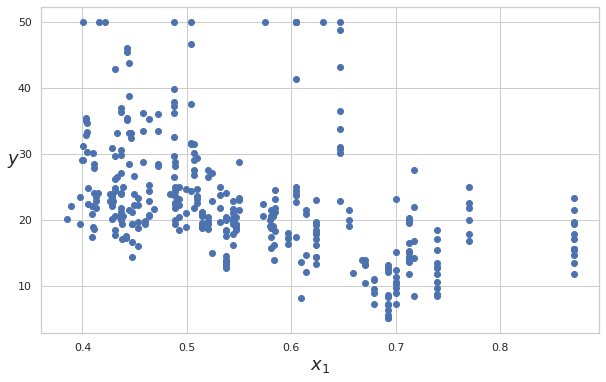

In [21]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)

plt.scatter(X_train, y_train)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

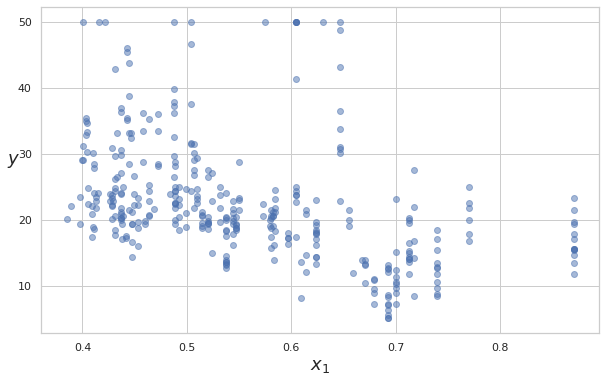

In [22]:
plt.scatter(X_train, y_train, alpha = 0.5)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f10d36048d0>,
      dtype=object)

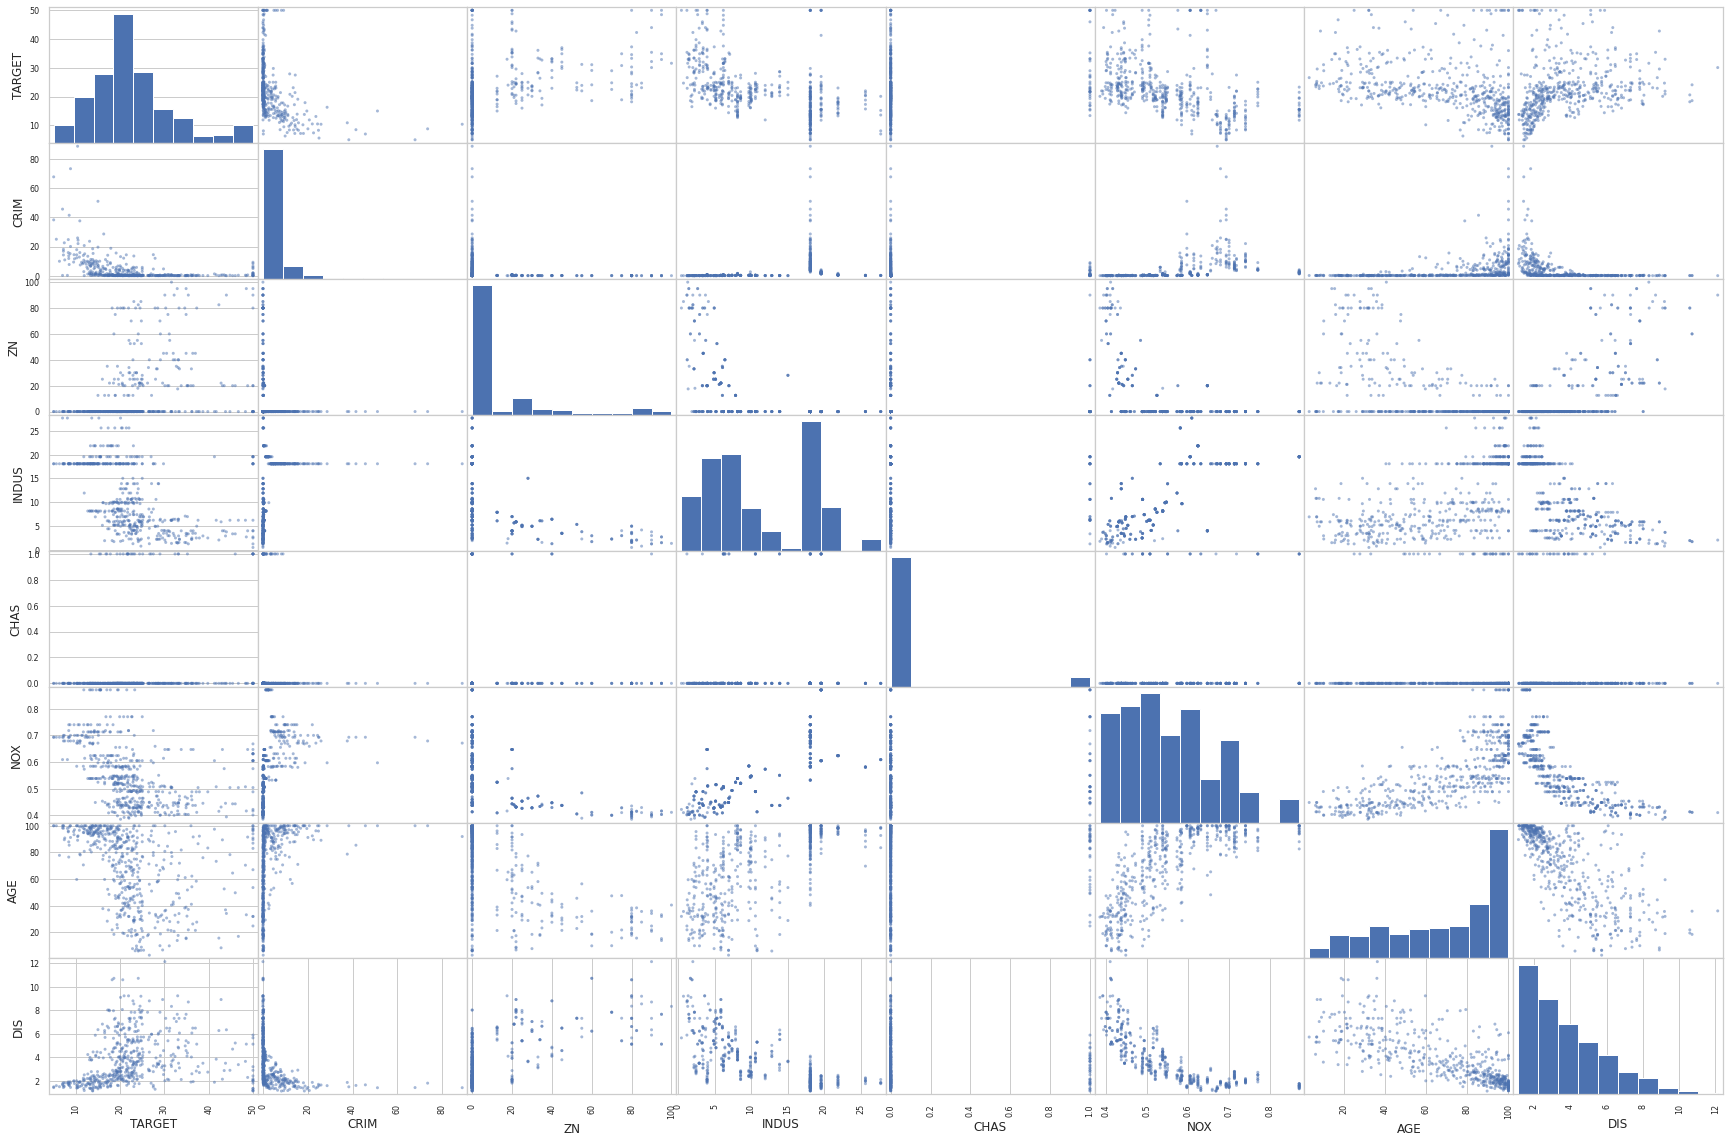

In [23]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

scatter_matrix(pddf[['TARGET','CRIM','ZN','INDUS','CHAS','NOX','AGE','DIS']], figsize=(30, 20))


# Linear Regression Model 

## Least Squeare Error

In [25]:
[np.ones(len(X_train)), X_train]

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 

In [26]:
#Añadimos columna de 1s para intercepto
X_b = np.array([np.ones(len(X_train)), X_train]).T
print(X_b)

[[1.     0.7   ]
 [1.     0.538 ]
 [1.     0.507 ]
 [1.     0.411 ]
 [1.     0.401 ]
 [1.     0.74  ]
 [1.     0.515 ]
 [1.     0.51  ]
 [1.     0.504 ]
 [1.     0.515 ]
 [1.     0.46  ]
 [1.     0.439 ]
 [1.     0.489 ]
 [1.     0.411 ]
 [1.     0.693 ]
 [1.     0.52  ]
 [1.     0.458 ]
 [1.     0.544 ]
 [1.     0.437 ]
 [1.     0.404 ]
 [1.     0.489 ]
 [1.     0.581 ]
 [1.     0.453 ]
 [1.     0.647 ]
 [1.     0.718 ]
 [1.     0.488 ]
 [1.     0.77  ]
 [1.     0.624 ]
 [1.     0.624 ]
 [1.     0.609 ]
 [1.     0.7   ]
 [1.     0.4161]
 [1.     0.428 ]
 [1.     0.4429]
 [1.     0.428 ]
 [1.     0.538 ]
 [1.     0.464 ]
 [1.     0.422 ]
 [1.     0.489 ]
 [1.     0.538 ]
 [1.     0.605 ]
 [1.     0.718 ]
 [1.     0.52  ]
 [1.     0.631 ]
 [1.     0.431 ]
 [1.     0.77  ]
 [1.     0.437 ]
 [1.     0.718 ]
 [1.     0.679 ]
 [1.     0.693 ]
 [1.     0.445 ]
 [1.     0.679 ]
 [1.     0.437 ]
 [1.     0.605 ]
 [1.     0.74  ]
 [1.     0.445 ]
 [1.     0.624 ]
 [1.     0.597 ]
 [1.     0.74 



Optimización por MCO

$$\beta = (X^{T}X)^{-1}X^{T}Y$$





In [27]:
B = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y_train

In [28]:
B

array([ 41.0158751 , -33.28402911])

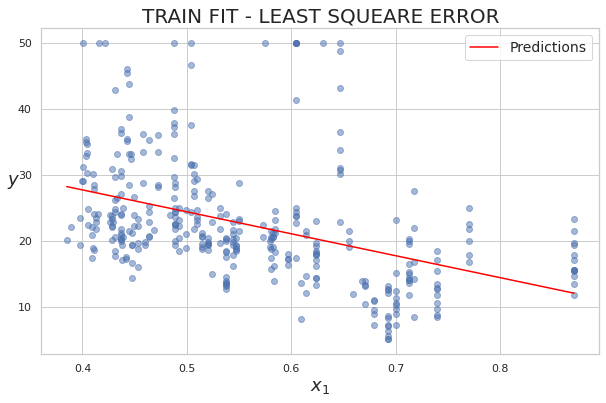

In [29]:

plt.title('TRAIN FIT - LEAST SQUEARE ERROR', fontsize=20)
plt.scatter(X_train, y_train, alpha = 0.5)
plt.plot([min(X_train), max(X_train)], [B[0] + B[1] * min(X_train), B[0] + B[1] * max(X_train)], c='red', label="Predictions")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

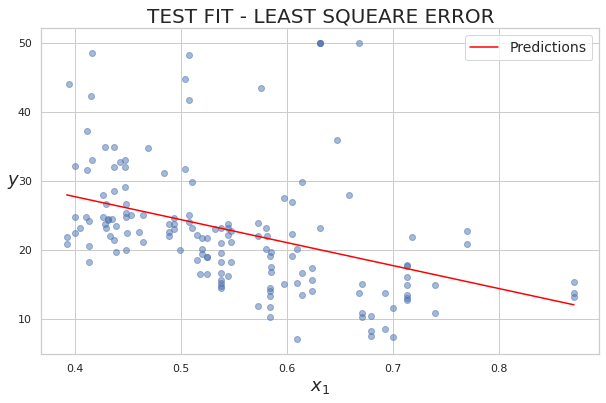

In [30]:

plt.title('TEST FIT - LEAST SQUEARE ERROR', fontsize=20)
plt.scatter(X_test, y_test, alpha = 0.5)
plt.plot([min(X_test), max(X_test)], [B[0] + B[1] * min(X_test), B[0] + B[1] * max(X_test)], c='red', label="Predictions")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()


## Bondad de ajuste

In [31]:
from sklearn.metrics import *

In [32]:
X_test_b = np.array([np.ones(len(X_test)), X_test]).T

y_train_predict = X_b.dot(B)
y_test_predict = X_test_b.dot(B)

In [34]:
# Mean absolute error (MAE)
print('TRAIN MAE: %f' %(mean_absolute_error(y_train, y_train_predict)))
print('TEST MAE: %f' %(mean_absolute_error(y_test, y_test_predict)))

TRAIN MAE: 6.015970
TEST MAE: 5.872398


In [36]:
# Mean squared error (MSE)
print('TRAIN MSE: %f' %(mean_squared_error(y_train, y_train_predict)))
print('TEST MSE: %f' %(mean_squared_error(y_test, y_test_predict)))

TRAIN MSE: 68.483993
TEST MSE: 70.235259


In [39]:
# Maximum residual error
print('TRAIN Maximum residual error: %f' %(max_error(y_train, y_train_predict)))
print('TEST Maximum residual error: %f' %(max_error(y_test, y_test_predict)))

TRAIN Maximum residual error: 30.518892
TEST Maximum residual error: 31.217856


In [40]:
# R2
print('TRAIN R2: %f' %(r2_score(y_train, y_train_predict)))
print('TEST R2: %f' %(r2_score(y_test, y_test_predict)))

TRAIN R2: 0.186497
TEST R2: 0.172997


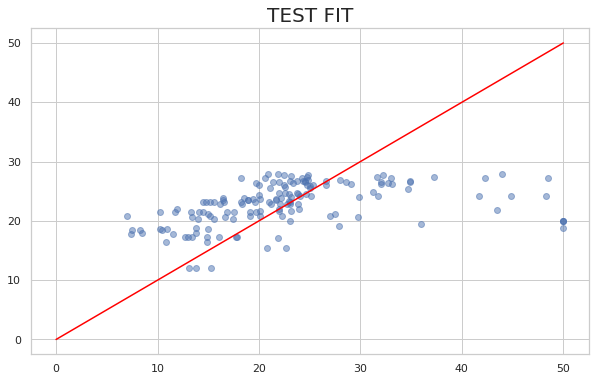

In [41]:
plt.title('TEST FIT', fontsize=20)
plt.scatter(y_test, y_test_predict, alpha = 0.5)
plt.plot([0, 50], [0, 50], c='red')

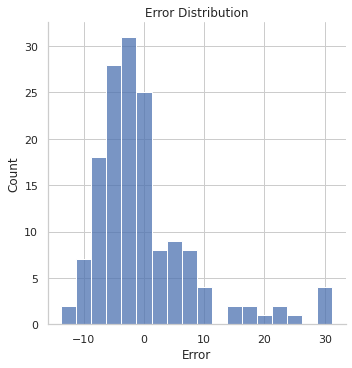

In [42]:
error = y_test - y_test_predict
sns.displot(error).set(title='Error Distribution', xlabel='Error')

# Sklearn linear model

In [43]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_b, y_train)
lin_reg.intercept_, lin_reg.coef_


(41.01587510470987, array([  0.        , -33.28402911]))

LinearRegression se basa en la función scipy.linalg.lstsq() (el nombre significa "mínimos cuadrados"), a la que puede llamar directamente:

In [44]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y_train, rcond=1e-6)
theta_best_svd

array([ 41.0158751 , -33.28402911])

Esta función calcula 𝐗 + 𝐲, donde 𝐗 + es el pseudoinverso de 𝐗 (específicamente el inverso de Moore-Penrose). Puede usar np.linalg.pinv () para calcular el pseudoinverso directamente:


<img src="https://www.programmersought.com/images/443/3f79cf5587f7ddac1441cfd24461d313.png" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">




In [45]:
np.linalg.pinv(X_b).dot(y_train)

array([ 41.0158751 , -33.28402911])

<img src="https://fractalytics.io/wp-content/uploads/2018/12/Moore-Penrose-CUDA.jpg" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">

# Linear regression using batch gradient descent

In [46]:
y_train_new = y_train

In [47]:
y_train_new = np.array(y_train).reshape((y_train.shape[0], 1))
y_train_new.shape

(354, 1)

In [48]:
y_train.shape[0]

354

In [52]:
eta = 0.1  # learning rate
n_iterations = 1000
m = y_train.shape[0]
mae = []

theta = np.random.randn(2,1)  # random initialization
theta

array([[ 0.2829785 ],
       [-1.50629471]])

In [53]:
for iteration in range(n_iterations):
    gradients = (2/m)*X_b.T.dot(X_b.dot(theta) - y_train_new)
    theta = theta - eta*gradients
    mae = mae + [sum(abs(X_b.dot(theta) - y_train_new))] 
    if iteration%100 == 0 or iteration == n_iterations-1:
      print('interation %f' %(iteration) , ' mae: ', sum(abs(X_b.dot(theta) - y_train_new)))

interation 0.000000  mae:  [6032.01225296]
interation 100.000000  mae:  [2341.03020472]
interation 200.000000  mae:  [2245.58257956]
interation 300.000000  mae:  [2185.47734549]
interation 400.000000  mae:  [2150.89104388]
interation 500.000000  mae:  [2131.96684305]
interation 600.000000  mae:  [2120.23085251]
interation 700.000000  mae:  [2118.26547085]
interation 800.000000  mae:  [2117.6148084]
interation 900.000000  mae:  [2118.1681498]
interation 999.000000  mae:  [2118.81411115]


In [55]:
theta

array([[ 38.31362555],
       [-28.48910562]])

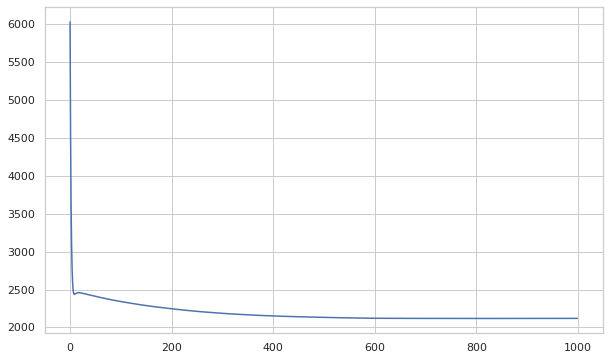

In [56]:
plt.plot(mae) 

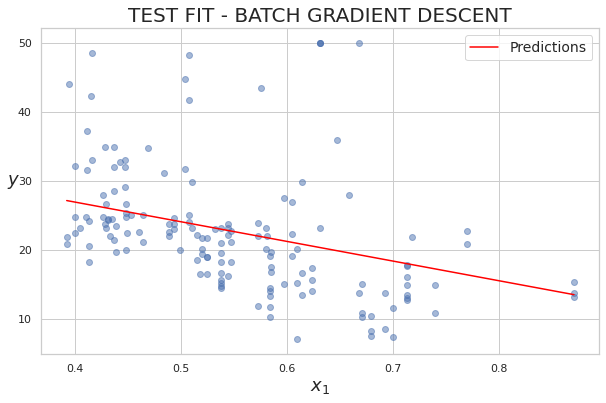

In [57]:

plt.title('TEST FIT - BATCH GRADIENT DESCENT', fontsize=20)
plt.scatter(X_test, y_test, alpha = 0.5)
plt.plot([min(X_test), max(X_test)], [theta[0] + theta[1] * min(X_test), theta[0] + theta[1] * max(X_test)], c='red', label="Predictions")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()


In [58]:

theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = y_train.shape[0]
    plt.scatter(X_train, y_train,  alpha = 0.5)
    n_iterations = 1000

    for iteration in range(n_iterations):
        if iteration < 10 or iteration==999:
            y_predict = X_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_train, y_predict, style)
        gradients = (2/m)*X_b.T.dot(X_b.dot(theta) - y_train_new)
        theta = theta - eta*gradients

        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0.35, 0.9, -10, 55])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

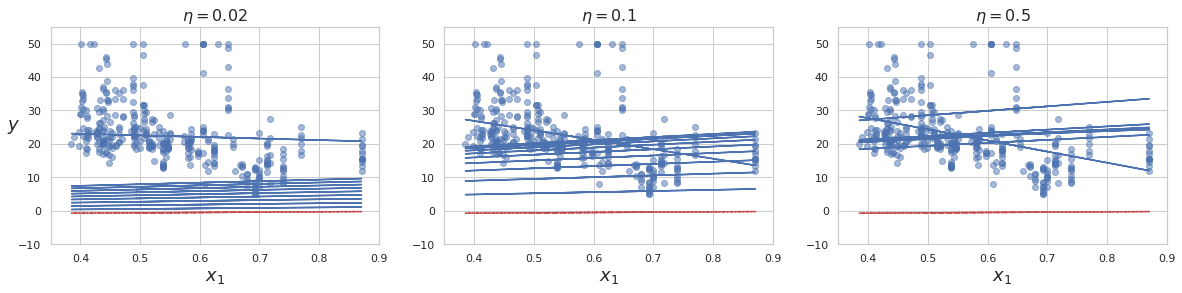

In [59]:
np.random.seed(123)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(20,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

# Stochastic Gradient Descent

In [ ]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(123)

In [ ]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if (epoch == 0 and i < 20) or (epoch == 49 and i == m-1):                   
            y_predict = X_b.dot(theta)          
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_train, y_predict, style)       
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y_train[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - np.array(yi))
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)               

plt.scatter(X_train, y_train, alpha = 0.5)                                
plt.xlabel("$x_1$", fontsize=18)                    
plt.ylabel("$y$", rotation=0, fontsize=18)         
plt.axis([0.35, 0.9, -5, 55])
plt.show()                                      

In [ ]:
theta

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=123)
sgd_reg.fit(X_b, y_train.ravel())


In [ ]:
sgd_reg.coef_

# Mini-batch gradient descent

In [ ]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(123)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y_train_new[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [ ]:
theta

In [ ]:
plt.title('TEST FIT - MINI BATCH GRADIENT DESCENT', fontsize=20)
plt.scatter(X_test, y_test, alpha = 0.5)
plt.plot([min(X_test), max(X_test)], [theta[0] + theta[1] * min(X_test), theta[0] + theta[1] * max(X_test)], c='red', label="Predictions")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()


# Comparación

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="lower left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.show()

In [ ]:
theta_path_sgd

# Polynomial regression

In [62]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias = False)


In [63]:
X_poly = poly_features.fit_transform(np.array([X_train]).T)

In [66]:
X_poly

array([[0.7       , 0.49      ],
       [0.538     , 0.289444  ],
       [0.507     , 0.257049  ],
       [0.411     , 0.168921  ],
       [0.401     , 0.160801  ],
       [0.74      , 0.5476    ],
       [0.515     , 0.265225  ],
       [0.51      , 0.2601    ],
       [0.504     , 0.254016  ],
       [0.515     , 0.265225  ],
       [0.46      , 0.2116    ],
       [0.439     , 0.192721  ],
       [0.489     , 0.239121  ],
       [0.411     , 0.168921  ],
       [0.693     , 0.480249  ],
       [0.52      , 0.2704    ],
       [0.458     , 0.209764  ],
       [0.544     , 0.295936  ],
       [0.437     , 0.190969  ],
       [0.404     , 0.163216  ],
       [0.489     , 0.239121  ],
       [0.581     , 0.337561  ],
       [0.453     , 0.205209  ],
       [0.647     , 0.418609  ],
       [0.718     , 0.515524  ],
       [0.488     , 0.238144  ],
       [0.77      , 0.5929    ],
       [0.624     , 0.389376  ],
       [0.624     , 0.389376  ],
       [0.609     , 0.370881  ],
       [0.

In [67]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
lin_reg.intercept_, lin_reg.coef_

(53.99305551597135, array([-78.46809383,  37.58065886]))

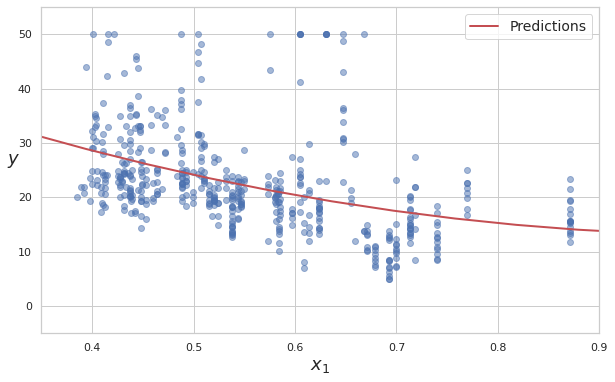

In [68]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.scatter(X, y, alpha = 0.5)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0.35, 0.9, -5, 55])
plt.legend(loc="upper right", fontsize=14)
plt.show()

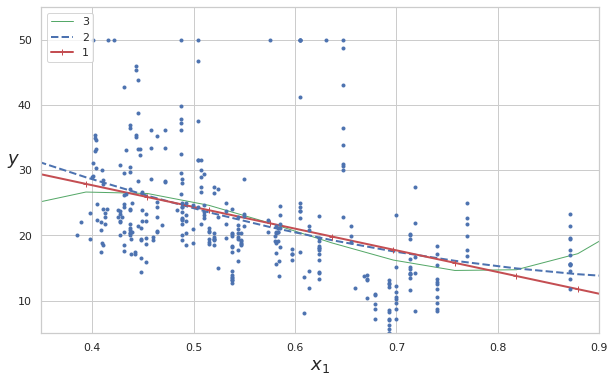

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 3), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(np.array([X_train]).T, y_train)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X_train, y_train, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0.35, 0.9, 5, 55])

plt.show()

# Multiple linear regression


In [70]:
pddf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
410,51.13580,0.0,18.10,0.0,0.5970,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
85,0.05735,0.0,4.49,0.0,0.4490,6.630,56.1,4.4377,3.0,247.0,18.5,392.30,6.53,26.6
280,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76,45.4
422,12.04820,0.0,18.10,0.0,0.6140,5.648,87.6,1.9512,24.0,666.0,20.2,291.55,14.10,20.8
199,0.03150,95.0,1.47,0.0,0.4030,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56,34.9


In [71]:
features = list(set(pddf.columns.tolist()) - set(['TARGET']))
len(features)

13

In [72]:
X = pddf[features]
y = pddf.TARGET

for col in features:
  X[col] = (X[col] - np.mean(X[col])) / np.std(X[col])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [73]:
X['intercepto'] = 1

In [74]:
X.head()

,CRIM,PTRATIO,TAX,B,LSTAT,CHAS,RAD,NOX,AGE,RM,INDUS,ZN,DIS,intercepto
410,5.530321,0.806576,1.530926,-3.882195,-0.356471,-0.272599,1.661245,0.365444,1.117494,-0.751699,1.015999,-0.487722,-1.132350,1
85,-0.413843,0.020560,-0.957633,0.390616,-0.858293,-0.272599,-0.752922,-0.913029,-0.443615,0.492028,-0.969827,-0.487722,0.305499,1
280,-0.416354,-1.643945,-1.141751,0.335904,-1.246574,-0.272599,-0.523001,-0.965723,-0.144906,2.187372,-1.139082,0.370669,0.427669,1
422,0.981571,0.806576,1.530926,-0.714043,0.202823,-0.272599,1.661245,0.512296,0.676543,-0.906987,1.015999,-0.487722,-0.876506,1
199,-0.416852,-0.672984,-0.037044,0.441052,-1.134435,-0.272599,-0.752922,-1.310392,-1.894486,0.983535,-1.410473,3.589637,1.834144,1


In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)


In [76]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None,  eta0=0.05, random_state=123)
sgd_reg.fit(X_train, y_train.ravel())

sgd_reg.score(X_train, y_train)

0.7973892508476412

In [77]:
sgd_reg.coef_

array([-0.88596196, -2.17136192, -1.79727533,  0.71091309, -2.84449175,
        0.26167682,  1.57244489, -1.58919284, -0.52415142,  3.78832679,
        0.01775138,  0.44787973, -2.56297908, 11.26456483])

In [85]:
pddf_res = pd.DataFrame({'feature':X_train.columns.tolist(),
              'parámetro':sgd_reg.coef_})
pddf_res

,feature,parámetro
0,CRIM,-0.885962
1,PTRATIO,-2.171362
2,TAX,-1.797275
3,B,0.710913
4,LSTAT,-2.844492
5,CHAS,0.261677
6,RAD,1.572445
7,NOX,-1.589193
8,AGE,-0.524151
9,RM,3.788327


In [90]:
pddf_res['abs_par'] = abs(pddf_res['parámetro'])
pddf_res['peso'] = pddf_res['abs_par']/(sum(pddf_res['abs_par'])-11.264565)
pddf_res.sort_values(by='abs_par', ascending=False)


,feature,parámetro,abs_par,peso
13,intercepto,11.264565,11.264565,0.587479
9,RM,3.788327,3.788327,0.197572
4,LSTAT,-2.844492,2.844492,0.148348
12,DIS,-2.562979,2.562979,0.133667
1,PTRATIO,-2.171362,2.171362,0.113243
2,TAX,-1.797275,1.797275,0.093733
7,NOX,-1.589193,1.589193,0.082881
6,RAD,1.572445,1.572445,0.082007
0,CRIM,-0.885962,0.885962,0.046205
3,B,0.710913,0.710913,0.037076


In [88]:
y_predicted_train = sgd_reg.predict(X_train)
y_predicted_test = sgd_reg.predict(X_test)


In [80]:
# R2
print('TRAIN R2: %f' %(r2_score(y_train, y_predicted_train)))
print('TEST R2: %f' %(r2_score(y_test, y_predicted_test)))

TRAIN R2: 0.797389
TEST R2: 0.549726


In [81]:
corrMatrix = pddf.corr()
print (corrMatrix)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

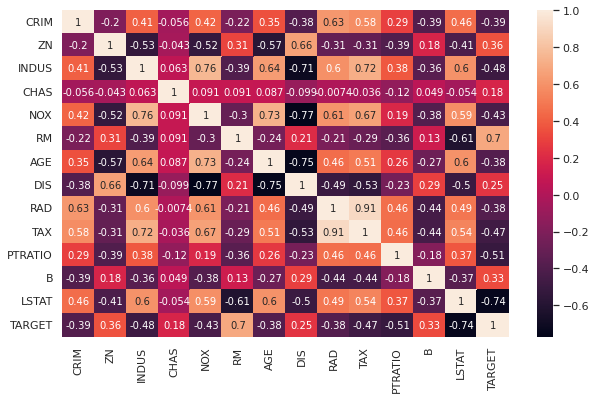

In [82]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(corrMatrix, annot=True)
plt.show()

In [83]:
import statsmodels.api as sm

# Fit and summarize OLS model
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                 TARGET   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     105.1
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          1.59e-110
Time:                        19:53:36   Log-Likelihood:                -1001.4
No. Observations:                 354   AIC:                             2031.
Df Residuals:                     340   BIC:                             2085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.9051      0.274     -3.304      0.0

### Gracias por completar este laboratorio!